# Script to Process Upper Columbia Habitat Quality Data Based on Criteria
# Data from RTT Prioritizatoin Process 
## Author: Ryan Niemeyer, Upper Columbia Salmon Recovery Board
### For more information, see https://www.ucsrb.org/prioritization/


In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://storage.googleapis.com/ff-storage-p01/festivals/logos/000/051/750/large/logo.jpg?1575572027", width=200, height=200)

## ------------------------------------ Upload Python Libraries -----------------------------------

In [96]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
# import geopandas as gpd
pd.options.display.max_colwidth = 150 # make it so print statements can be longer
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
# CHEAT SHEET for pd and np commands: https://www.dataquest.io/blog/pandas-cheat-sheet/#:~:text=%20Pandas%20Cheat%20Sheet%20%E2%80%94%20Python%20for%20Data,CSV%2C%20.xlsx%2C%20SQL%2C%20or%20JSON.%20%20More%20

## ----------------------------------------------------------------------------------------------------------------------------
##             Choose the Criteria for Habitat Quality Output Table and Output  
## ----------------------------------------------------------------------------------------------------------------------------
### !!!!! DOUBLE CHECK these are the criteria you want !!!!!!!!!!!!!!

## Criteria for Query
### Update if criteria for output habitat quality tables change

In [129]:
# -------- Assessment Unit (AU) (HUC12) Tier rank (data in habitat_attribute_scores) ----------------
AU_Rank = [1]                        # 1 is high priority, 3 is low priority
# --------------- Reach Confinment (data in confinement_scores) --------------------------------
Reach_Confinement = [5]              # 1, 3, 5, where 1 is higher % confined, 5 is higher % unconfined, based on USGS Valley Confinment Algorithm
# for test
#Reach_Confinement = [1, 3, 5]           # ONLY for testing 

# --------------- Sum Life Stage (sum of all the life stages present in reach) ---------------------
Sum_Life_Stage = [4, 5, 6, 7]   # number of life stages present in a reach

# ----------------- Habitat Quality Score (data in habitat_attribute_scores) -----------------
Habitat_Quality_score = [5]      # based on "goldilocks method" where 5 is highest proirity, 1 is lowest

# --------------------- Habitat Attribute Scores-- "DRAFT Habitat Attribute..." data (data in Cumul_Habitat_Attribute_Score)
# Oct 2020: did [1] (Acceptable only)   OR [1, 3] (Acceptable and At Risk)
Individual_Habitat_Attribute_Score = [1]   # possible scores - [1,3,5] 1 - unacceptable, 5 - adequate


## Tables and Column Names of Indicators/Variables
### Update if excel input names change OR column names change

In [130]:
# ------ AU_rank_vars = habitat_attribute_scores = 'AU Tier Spring CHN' and 'AU Tier Steelhead'
AU_Rank_vars = { 
 'data_frame': ['habitat_quality_scores', 'habitat_quality_scores'  ], 
 'variable': ['AU Rank Sp CHN' , 'AU Rank STL'] 
} 
# create a dataframe 
AU_Rank_vars = pd.DataFrame(AU_Rank_vars, columns = ['data_frame', 'variable']) 


# ------ Reach_Confinement: confinement_scores = 'Score' -------
Reach_Confinement_vars = { 
 'data_frame': ['confinement_scores' ], 
 'variable': ['Score'] 
} 
# create a dataframe 
Reach_Confinement_vars = pd.DataFrame(Reach_Confinement_vars, columns = ['data_frame', 'variable']) 


# ------ Sum_Life_Stage:   reach_life_stages = 'Sum_LifeStage'
Sum_Life_Stage_vars = { 
 'data_frame': ['reach_life_stages'  ], 
 'variable': ['TotalNum_LS']
    
} 
# create a dataframe 
Sum_Life_Stage_vars = pd.DataFrame(Sum_Life_Stage_vars, columns = ['data_frame', 'variable']) 


# ------ Habitat_Quality_score: habitat_attribute_scores = 'DRAFT Habitat Attribute Score (Currently MAX Score OR "0" if NA)'
Habitat_Quality_score_vars = { 
 'data_frame': ['habitat_quality_scores' ], 
 'variable': ['HQ_Score'] 
} 
# create a dataframe 
Habitat_Quality_score_vars = pd.DataFrame(Habitat_Quality_score_vars, columns = ['data_frame', 'variable']) 


## Output directory
### Update if you want output path to change

In [131]:
output_name_Spring_Chinook = 'Habitat_Quality_Output_Spring_Chinook.xlsx'
output_name_Steelhead = 'Habitat_Quality_Output_Steelhead.xlsx'
output_location = 'Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/'
output_location_Spring_Chinook =  output_location + output_name_Spring_Chinook
output_location_Steelhead =  output_location + output_name_Steelhead
print('output for Spring Chinook habitat quality table: ')
print(output_location_Spring_Chinook)
print("   ")
print('output for Steelhead habitat quality table: ' )
print(output_location_Steelhead)

output for Spring Chinook habitat quality table: 
Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/Habitat_Quality_Output_Spring_Chinook.xlsx
   
output for Steelhead habitat quality table: 
Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/Habitat_Quality_Output_Steelhead.xlsx


## ---------------------------- Upload the Habitat Data Excel ---------------------------- 

### Open Habitat Analaysis Tabs: Habitat Attribute Score, Confinement Scores

In [100]:
habitat_quality_scores = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_HabitatAnalysis.xlsx', 
                   'HabitatQuality_Scores', skiprows=[0])
confinement_scores = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_HabitatAnalysis.xlsx', 
                   'Confinement_Scores')

### Open Tables from Habitat Database: Reach Life Stage

In [101]:
reach_life_stages_Spring_Chinook = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_HabitatAnalysis.xlsx', 
                   'Reaches Life Stage Spring Chino')
reach_life_stages_Steelhead = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/MASTER_Step2_HabitatAnalysis.xlsx', 
                   'Reaches Life Stage Steelhead')

## ---------------------------- Use Criteria to Generate Table for Spring Chinook ----------------------------

### Filter out to only have Spring Chinook reaches

In [132]:
spring_chinook_reaches_true = ['yes']
Spring_Chinook_data_frame = habitat_quality_scores.loc[habitat_quality_scores['Spring.Chinook.Reach'].isin(spring_chinook_reaches_true)] 
print('initial number of reaches: ' + str(habitat_quality_scores.shape[0]) )
print('number of reaches after including only Spring Chinook reaches: ' + str(Spring_Chinook_data_frame.shape[0]) )

initial number of reaches: 739
number of reaches after including only Spring Chinook reaches: 393


### Filter out by AU Rank - NOTE - change "variable" based on species

In [133]:
# NOTE: need to change variable to 0 or 1 (AU_Rank_vars['variable'][1]) based on species 
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame[AU_Rank_vars['variable'][0]].isin(AU_Rank)] 
print('number of reaches after AU criteria: ' + str(Spring_Chinook_data_frame.shape[0]) )

number of reaches after AU criteria: 135


### Filter out by Habitat Quality Score

In [134]:
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame[Habitat_Quality_score_vars['variable'][0]].isin(Habitat_Quality_score)] 
print('habitat quality scores used for filter: ' + str(Habitat_Quality_score))
print('number of reaches/row after Habitat Quality Score criteria:' + str(Spring_Chinook_data_frame.shape[0]) )

habitat quality scores used for filter: [5]
number of reaches/row after Habitat Quality Score criteria:84


### Filter out by Reach Confinement

In [135]:
Confinement_Criteria = confinement_scores.loc[confinement_scores[Reach_Confinement_vars['variable'][0]].isin(Reach_Confinement)]
Confinement_Criteria_Reaches = Confinement_Criteria.ReachName
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame['ReachName'].isin(Confinement_Criteria_Reaches)] 
print('confinement scores used for criteria where 1 is higher percent confined, 5 is higher percent unconfined, based on USGS Valley Confinment Algorithm): ' + str(Reach_Confinement))
print('number of reaches/row after Reach Confinement criteria: ' + str(Spring_Chinook_data_frame.shape[0]) )

confinement scores used for criteria where 1 is higher percent confined, 5 is higher percent unconfined, based on USGS Valley Confinment Algorithm): [5]
number of reaches/row after Reach Confinement criteria: 82


### Filter out by Sum Life Stage

In [136]:
Sum_Life_Stage_Criteria = reach_life_stages_Spring_Chinook.loc[reach_life_stages_Spring_Chinook[Sum_Life_Stage_vars['variable'][0]].isin(Sum_Life_Stage)]
Sum_Life_Stage_Criteria_Reaches = Sum_Life_Stage_Criteria.ReachName
Spring_Chinook_data_frame = Spring_Chinook_data_frame.loc[Spring_Chinook_data_frame['ReachName'].isin(Sum_Life_Stage_Criteria_Reaches)] 

# ------------- Prep Sum Life Stage ----------
Sum_Life_Stage_output = Sum_Life_Stage_Criteria.loc[Sum_Life_Stage_Criteria['ReachName'].isin(Spring_Chinook_data_frame.ReachName)] 
Sum_Life_Stage_output = Sum_Life_Stage_output[['ReachName',Sum_Life_Stage_vars['variable'][0]]]
# ------- add life Stage Sum --------------
Spring_Chinook_data_frame = Spring_Chinook_data_frame.sort_values(by = 'ReachName') 
Spring_Chinook_data_frame = pd.merge(Spring_Chinook_data_frame, Sum_Life_Stage_output, on=['ReachName'])

print('number of reaches/row after Sum Life Stage criteria: ' + str(Spring_Chinook_data_frame.shape[0]) )

number of reaches/row after Sum Life Stage criteria: 81


## -------------------------------- Use Criteria to Generate Table for Steelhead --------------------------------

### Filter out to only have Steelhead reaches

In [137]:
steelhead_reaches_true = ['yes']
Steelhead_data_frame = habitat_quality_scores.loc[habitat_quality_scores['Steelhead.Reach'].isin(steelhead_reaches_true)] 
print('initial number of reaches: ' + str(habitat_quality_scores.shape[0]) )
print('number of reaches after including only Steelhead reaches: ' + str(Steelhead_data_frame.shape[0]) )

initial number of reaches: 739
number of reaches after including only Steelhead reaches: 614


### Filter out by AU Rank - NOTE - change "variable" based on species

In [138]:
# NOTE: need to change variable to 0 or 1 (AU_Rank_vars['variable'][1]) based on species 
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame[AU_Rank_vars['variable'][1]].isin(AU_Rank)] 
print('number of reaches after AU criteria: ' + str(Steelhead_data_frame.shape[0]) )

number of reaches after AU criteria: 227


### Filter out by Habitat Quality Score

In [139]:
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame[Habitat_Quality_score_vars['variable'][0]].isin(Habitat_Quality_score)] 
print('habitat quality scores used for filter: ' + str(Habitat_Quality_score))
print('number of reaches after Habitat Quality Score criteria: ' + str(Steelhead_data_frame.shape[0]) )

habitat quality scores used for filter: [5]
number of reaches after Habitat Quality Score criteria: 108


### Filter out by Reach Confinement

In [140]:
Confinement_Criteria = confinement_scores.loc[confinement_scores[Reach_Confinement_vars['variable'][0]].isin(Reach_Confinement)]
Confinement_Criteria_Reaches = Confinement_Criteria.ReachName
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame['ReachName'].isin(Confinement_Criteria_Reaches)] 
print('confinement scores used for criteria where 1 is higher percent confined, 5 is higher percent unconfined, based on USGS Valley Confinment Algorithm): ' + str(Reach_Confinement))
print('number of reaches after Reach Confinement criteria: ' + str(Steelhead_data_frame.shape[0]) )

confinement scores used for criteria where 1 is higher percent confined, 5 is higher percent unconfined, based on USGS Valley Confinment Algorithm): [5]
number of reaches after Reach Confinement criteria: 104


### Filter out by Sum Life Stage

In [141]:
Sum_Life_Stage_Criteria = reach_life_stages_Steelhead.loc[reach_life_stages_Steelhead[Sum_Life_Stage_vars['variable'][0]].isin(Sum_Life_Stage)]
Sum_Life_Stage_Criteria_Reaches = Sum_Life_Stage_Criteria.ReachName
Steelhead_data_frame = Steelhead_data_frame.loc[Steelhead_data_frame['ReachName'].isin(Sum_Life_Stage_Criteria_Reaches)]

# ------------- Prep Sum Life Stage ----------
Sum_Life_Stage_output = Sum_Life_Stage_Criteria.loc[Sum_Life_Stage_Criteria['ReachName'].isin(Steelhead_data_frame.ReachName)] 
Sum_Life_Stage_output = Sum_Life_Stage_output[['ReachName',Sum_Life_Stage_vars['variable'][0]]]
# ------- add life Stage Sum --------------
Steelhead_data_frame = Steelhead_data_frame.sort_values(by = 'ReachName') 
Steelhead_data_frame = pd.merge(Steelhead_data_frame, Sum_Life_Stage_output, on=['ReachName'])
print('number of reaches after Sum Life Stage criteria: ' + str(Steelhead_data_frame.shape[0]) )

number of reaches after Sum Life Stage criteria: 103


# ------------------------- Diagnostic test to verifiy outputs are correct -----------------------
#### Steps 1) Go into MASTER_Step2_HabitatAnalysis, then go to "HabitatQuality_Scores" tab
####       2) in the MASTER... spreadsheet, choose criteria that matches with this output (of the five filters, that tab has all but confinment)
####        ------a) Spring Chinook/Steelhead Reach: Spring.Chinook.Reach
####        ------b) AU_Rank: AU Rank Sp CHN (for STLHD)
####        ------c) Habitat_Quality_Score: HQ_Score
####        ------d) Sum_Life_Stage: TotalNum_LS
####       3) copy the "filtered" HabitatQuality_Scores spreadsheet, paste in a new excel spreadsheet and save
####       3) make sure the criteria in this script is exact as in your filter (confinment should be [1, 3, 5])
####       4) run the script below (with correct path to the saved spreadsheet)

In [142]:
# -------------------------------------------------------------------------------------
#            Reach Names generated from this scrpit 
# -------------------------------------------------------------------------------------

python_script_output_Steelhead_ReachNames = Steelhead_data_frame.ReachName.tolist()
python_script_output_Spring_Chinook_ReachNames = Spring_Chinook_data_frame.ReachName.tolist()
# ----------- sort Reach Names so they are in order ----------
python_script_output_Steelhead_ReachNames.sort()
python_script_output_Spring_Chinook_ReachNames.sort()

In [93]:
# -------------------------------------------------------------------------------------
#            Reach Names generated from this scrpit (saved on 25.Sept.2020 w/ confinment = [1,3,5])
# -------------------------------------------------------------------------------------
#python_script_output_Steelhead_ReachNames = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/Habitat_Quality_Output_Steelhead_Sept25.xlsx')
#python_script_output_Spring_Chinook_ReachNames = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/Habitat_Quality_Output_Spring_Chinook_Sept25.xlsx')
# ---------------- Just get the Reach Name to list ----------
#python_script_output_Steelhead_ReachNames = python_script_output_Steelhead_ReachNames.ReachName.tolist()
#python_script_output_Spring_Chinook_ReachNames = python_script_output_Spring_Chinook_ReachNames.ReachName.tolist()
#----------- sort Reach Names so they are in order ----------
#python_script_output_Steelhead_ReachNames.sort()
#python_script_output_Spring_Chinook_ReachNames.sort()


In [123]:
# -------------------------------------------------------------------------------------
#            Reach Names copied from MASTER_Step2_HabitatAnalysis
# -------------------------------------------------------------------------------------

# ------------------- Read in Saved Filter data (from MASTER_Step2_HabitatAnalysis excel file) -----------------
HQ_Steelhead_filtered = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/HQ_Steelhead_FROM_FILTER_IN_MASTER_Step2_HabitatAnalysis_12Oct.xlsx')
HQ_Spring_Chinook_filtered = pd.read_excel('Y:/UCRTT/Prioritization/Step 2/Habitat Evaluation/Step2_Prioritization_Python_Output/HQ_SpringChinook_FROM_FILTER_IN_MASTER_Step2_HabitatAnalysis_12Oct.xlsx')
# ---------------- Just get the Reach Name from filtered MASTER data ----------
MASTER_output_Steelhead_ReachNames = HQ_Steelhead_filtered.ReachName.tolist()
MASTER_output_Spring_Chinook_ReachNames = HQ_Spring_Chinook_filtered.ReachName.tolist()
# ----------- sort Reach Names so they are in order ----------
MASTER_output_Steelhead_ReachNames.sort()
MASTER_output_Spring_Chinook_ReachNames.sort()

## --------------------- Script to output IF there are any reach discrepencies
### have three outputs: "MASTER_output_Steelhead_ReachNames identical list - test passed!","Filtered MASTER data has extra reaches: BLANK", OR "Python script output data has extra reaches: BLANK"

In [124]:
# ---------------------------------------------------------------
#            Functions to identify discrepencies
# ---------------------------------------------------------------

def is_identical(list_a, list_b):
    list_a.sort()
    list_b.sort()
    return list_a == list_b


# this function outputs items in list_a that are not in list_b
def get_difference(list_a, list_b):
    list_a.sort()
    list_b.sort()
    return set(list_a)-set(list_b)
 
# did not use this one
l_func = lambda x, y: list((set(x)- set(y))) + list((set(y)- set(x))) 


## --------------------- Run IF loops ---------------------------

In [125]:

# -------------------- Identify if lists are the same ------------

if is_identical(MASTER_output_Steelhead_ReachNames, python_script_output_Steelhead_ReachNames):
    print("Two lists are identical.")
else:
    print("Two lists are different.")
    print("  ")

Two lists are identical.


In [126]:
# ---------- gets "extra" reaches in MASTER_Step2_HabitatAnalysis ---------------
if(len(get_difference(MASTER_output_Steelhead_ReachNames, python_script_output_Steelhead_ReachNames)) > 0):

    reaches_MASTER = get_difference(MASTER_output_Steelhead_ReachNames, python_script_output_Steelhead_ReachNames)

    print("List of 'extra' MASTER/Original reaches at 'reaches_MASTER', total is: " + str(len(reaches_MASTER)))
print("  ") 

# ---------- gets "extra" reaches generated by python script ---------------
if(len(get_difference(python_script_output_Steelhead_ReachNames, MASTER_output_Steelhead_ReachNames)) > 0):
    reaches_Python = get_difference(python_script_output_Steelhead_ReachNames, MASTER_output_Steelhead_ReachNames)
    print("List of 'extra' Python script reaches at 'reaches_Python', total is: " + str(len(reaches_Python)))

##  -------------------------------- Save/Output  the data to specified directory -----------------------------
### This is the output for the script, not the test

In [143]:
# ------------ Add species name to output ---------------
Spring_Chinook_data_frame['Species'] = "Spring Chinook"
Steelhead_data_frame['Species'] = "Steelhead"

In [144]:
# ---------------- Save Spring Chinook -------------
Spring_Chinook_data_frame.to_excel(output_location_Spring_Chinook, index = False)

In [145]:
# -------------- Save Steelhead data ----------------
Steelhead_data_frame.to_excel(output_location_Steelhead, index = False)

##  -------------------------------- Print/Explore Data  -------------------------------

In [17]:
# Sum_Life_Stage_Criteria[Sum_Life_Stage_Criteria.AssessmentUnit.isin(['Lower Chiwawa River '])]

In [66]:
Spring_Chinook_data_frame['Assessment Unit'].unique()

array(['Chewuch River-Pearrygin Creek', 'Entiat River-Lake Creek',
       'Methow River-Fawn Creek', 'Methow River-Rattlesnake Creek',
       'Lower Nason Creek ', 'Lower Twisp River ',
       'Wenatchee River-Beaver Creek', 'Chewuch River-Doe Creek',
       'Entiat River-Potato Creek', 'Entiat River-Preston Creek',
       'Middle Twisp River '], dtype=object)

In [67]:
Spring_Chinook_data_frame[Spring_Chinook_data_frame['Assessment Unit'].isin(['Chewuch River-Pearrygin Creek'])]

,ReachName,Assessment Unit,Subbasin,Spring.Chinook.Reach,Steelhead.Reach,AU Rank Sp CHN,AU Rank STL,Temperature,Flow- Summer Base Flow,Riparian- Structure,...,Off-Channel- Floodplain,Off-Channel- Side-Channels,Off-Channel,Channel Stability,Bank Stability,Stability,HQ_Sum,HQ_Pct,HQ_Score,"Reviewer Comments (please note your suggested change [0, 3, or 5] and document your rationale for changing the value."
540,Chewuch River Pearrygin 07,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,3.0,...,1.0,3.0,2.0,3.0,3.0,3.0,22.333333,0.558333,5.0,NaN
542,Chewuch River Pearrygin 10,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,NaN,...,1.0,3.0,2.0,3.0,3.0,3.0,23.000000,0.575000,5.0,NaN
543,Chewuch River Pearrygin 11,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,NaN,...,1.0,3.0,2.0,3.0,3.0,3.0,23.000000,0.575000,5.0,NaN
627,Chewuch River Pearrygin 01,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,26.000000,0.650000,4.0,NaN
628,Chewuch River Pearrygin 02,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,26.000000,0.650000,4.0,NaN
629,Chewuch River Pearrygin 03,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,3.0,...,3.0,3.0,3.0,5.0,5.0,5.0,25.333333,0.633333,4.0,NaN
630,Chewuch River Pearrygin 04,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,3.0,...,3.0,3.0,3.0,5.0,5.0,5.0,25.333333,0.633333,4.0,NaN
631,Chewuch River Pearrygin 05,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,25.333333,0.633333,4.0,NaN
632,Chewuch River Pearrygin 06,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,5.0,...,3.0,3.0,3.0,3.0,3.0,3.0,25.333333,0.633333,4.0,NaN
633,Chewuch River Pearrygin 08,Chewuch River-Pearrygin Creek,Methow,yes,yes,1,1,1.0,3.0,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,29.000000,0.725000,4.0,NaN


In [77]:
confinement_scores['Assessment Unit'].sort_values().unique()

array(['Aeneas Creek Okanogan', 'Alder Creek-Methow River ',
       'Andrews Creek ', 'Bear Creek ', 'Big Meadow Creek ',
       'Black Canyon Creek ', 'Boulder Creek ', 'Buttermilk Creek',
       'Cedar Creek', 'Chewuch River-Doe Creek',
       'Chewuch River-Kay Creek', 'Chewuch River-Pearrygin Creek',
       'Chewuch River-Thirtymile Creek', 'Chikamin Creek',
       'Chiwaukum Creek', 'Chiwawa River Headwaters ', 'Chumstick Creek',
       'Cub Creek', 'Diamond Creek', 'Eagle Creek (Methow)',
       'Eagle Creek (Wenatchee)', 'Early Winters Creek',
       'East Fork Mission Creek', 'Eight Mile Creek',
       'Entiat River-Lake Creek', 'Entiat River-Mills Creek',
       'Entiat River-Potato Creek', 'Entiat River-Preston Creek',
       'Eureka Creek Methow', 'Falls Creek Methow',
       'French Creek (Wenatchee)', 'Goat Creek ', 'Gold Creek',
       'Ingalls Creek ', 'Jack Creek ', 'Johnson Creek',
       'Lake Creek (Methow)', 'Lake Creek (Wenatchee)', 'Lake Wenatchee ',
       'Libby

In [78]:
confinement_scores[confinement_scores['Assessment Unit'].isin(['Lower Chiwawa River '])]

,ReachName,Assessment Unit,Subbasin,Unconfined_mi,Confined_mi,Unconfined_Total,Unconfined_Pct,Confined_Pct,Score,"Reviewer Comments (please note your suggested change [0, 3, or 5] and document your rationale for changing the value."
2,Alder Creek 01,Lower Chiwawa River,Wenatchee,0.750322,0.029233,0.779554,96.250164,3.749965,5,NaN
3,Alder Creek 02,Lower Chiwawa River,Wenatchee,NaN,1.388638,1.388638,0.000000,100.000000,1,NaN
51,Brush Creek 01,Lower Chiwawa River,Wenatchee,0.225947,0.079009,0.304956,74.091672,25.908328,5,NaN
52,Brush Creek 02,Lower Chiwawa River,Wenatchee,0.172058,0.490075,0.662133,25.985414,74.014586,1,NaN
105,Chiwawa River Lower 01,Lower Chiwawa River,Wenatchee,1.598516,0.296404,1.894920,84.357968,15.642032,5,NaN
106,Chiwawa River Lower 02,Lower Chiwawa River,Wenatchee,0.602521,0.427176,1.029697,58.514398,41.485602,3,NaN
107,Chiwawa River Lower 03,Lower Chiwawa River,Wenatchee,0.818099,1.722761,2.540860,32.197720,67.802280,3,NaN
108,Chiwawa River Lower 04,Lower Chiwawa River,Wenatchee,0.526914,1.157180,1.684093,31.287702,68.712357,3,NaN
109,Chiwawa River Lower 05,Lower Chiwawa River,Wenatchee,0.284754,2.100927,2.385681,11.935963,88.064037,1,NaN
110,Chiwawa River Lower 06,Lower Chiwawa River,Wenatchee,0.973131,0.665105,1.638236,59.401149,40.598851,3,NaN


In [57]:
Spring_Chinook_data_frame.columns

Index(['ReachName', 'Assessment Unit', 'Subbasin', 'Spring.Chinook.Reach',
       'Steelhead.Reach', 'AU Rank Sp CHN', 'AU Rank STL', 'Confinement',
       'Number of Life Stages- SPCHN', 'Number of Life Stages- STL',
       'Temperature- Rearing', 'Flow- Summer Base Flow', 'Riparian- Structure',
       'Riparian-Disturbance', 'Riparian- Canopy Cover', 'Riparian',
       'Coarse Substrate', 'Cover- Wood', 'Pool Quantity& Quality',
       'Off-Channel- Floodplain', 'Off-Channel- Side-Channels',
       'Channel Stability', 'Bank Stability', 'Stability', 'HQ_Sum', 'HQ_Pct',
       'HQ_Score', 'Comments', 'TotalNum_LS', 'Species'],
      dtype='object')

## -------------- End of code - this is EXTRA - just playing with the data ------

In [20]:
reach_life_stages.head()

,ReachName,Basin,AssessmentUnit,SpringChinookReach,SPCH_Adult_Migration,SPCH_Holding,SPCH_Spawning,SPCH_Fry_Colonization,SPCH_Summer_Rearing,SPCH_Winter_Rearing,SPCH_Smolt_Emigration,Sum_LifeStage
0,Aeneas Creek 01,Okanogan,Aeneas Creek Okanogan,no,0,0,0,0,0,0,0,0
1,Aeneas Creek 02,Okanogan,Aeneas Creek Okanogan,no,0,0,0,0,0,0,0,0
2,Alder Creek 01,Wenatchee,Lower Chiwawa River,yes,0,0,1,1,0,0,1,3
3,Alder Creek 02,Wenatchee,Lower Chiwawa River,no,0,0,1,1,0,0,0,2
4,Andrews Creek 01,Methow,Andrews Creek,yes,0,0,0,0,1,1,0,2


In [21]:
habitat_quality_scores.columns

Index(['ReachName', 'Assessment Unit', 'Subbasin', 'Spring.Chinook.Reach',
       'Steelhead.Reach', 'AU Rank Sp CHN', 'AU Rank STL', 'Temperature',
       'Flow- Summer Base Flow', 'Riparian- Structure', 'Riparian-Disturbance',
       'Riparian- Canopy Cover', 'Total Riparian', 'Substrate', 'Cover- Wood',
       'Pools- All Pools', 'Off-Channel- Floodplain',
       'Off-Channel- Side-Channels', 'Off-Channel Total', 'Channel Stability',
       'Bank Stability', 'Stability Total', 'HQ_Sum', 'HQ_Pct', 'HQ_Score',
       'Reviewer Comments (please note your suggested change [0, 3, or 5] and document your rationale for changing the value.'],
      dtype='object')

In [8]:
habitat_quality_scores.columns

Index(['ReachName', 'Assessment Unit', 'Subbasin', 'Spring.Chinook.Reach',
       'Steelhead.Reach', 'AU Rank Sp CHN', 'AU Rank STL', 'Temperature',
       'Flow- Summer Base Flow', 'Riparian- Structure', 'Riparian-Disturbance',
       'Riparian- Canopy Cover', 'Total Riparian', 'Substrate', 'Cover- Wood',
       'Pools- All Pools', 'Off-Channel- Floodplain',
       'Off-Channel- Side-Channels', 'Off-Channel Total', 'Channel Stability',
       'Bank Stability', 'Stability Total', 'HQ_Sum', 'HQ_Pct', 'HQ_Score',
       'Reviewer Comments (please note your suggested change [0, 3, or 5] and document your rationale for changing the value.'],
      dtype='object')

In [9]:
habitat_quality_scores['Riparian- Structure']

0      NaN
1      NaN
2      NaN
3        5
4      NaN
      ... 
729      5
730      3
731      5
732      1
733      1
Name: Riparian- Structure, Length: 734, dtype: object

(array([279., 111., 349.,   0.,   0.]),
 array([ 0,  2,  4,  6,  8, 10]),
 <a list of 5 Patch objects>)

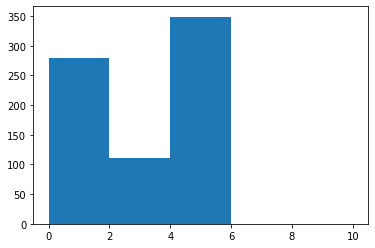

In [22]:
plt.hist(confinement_scores['Score'],bins = [0,2,4,6,8,10]) 

In [23]:
list(reach_life_stages.columns)

['ReachName',
 'Basin',
 'AssessmentUnit',
 'SpringChinookReach',
 'SPCH_Adult_Migration',
 'SPCH_Holding',
 'SPCH_Spawning',
 'SPCH_Fry_Colonization',
 'SPCH_Summer_Rearing',
 'SPCH_Winter_Rearing',
 'SPCH_Smolt_Emigration',
 'Sum_LifeStage']

TypeError: 'value' must be an instance of str or bytes, not a int

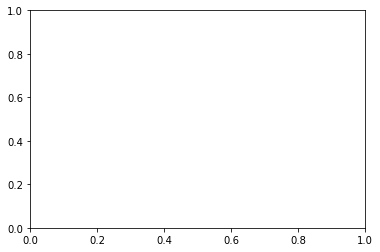

In [24]:
plt.hist(habitat_quality_scores['AU Rank Sp CHN'][9:22],bins = [0,1,2,3,4])

In [ ]:
habitat_quality_scores['AU Rank Sp CHN'][35:70]

In [ ]:
list(habitat_quality_scores.columns)